# TensorFlow Regression Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [5]:
noise.shape

(1000000,)

In [6]:
noise

array([ 0.60713234, -1.44464271, -1.11433714, ..., -1.26604983,
       -0.50684167,  1.1861678 ])

y = mx + b

b = 5

In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [10]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [11]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
y_df.head()

,Y
0,5.607132
1,3.555362
2,3.885673
3,5.884554
4,3.924761


In [13]:
my_data = pd.concat([x_df, y_df], axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,5.607132
1,0.00001,3.555362
2,0.00002,3.885673
3,0.00003,5.884554
4,0.00004,3.924761


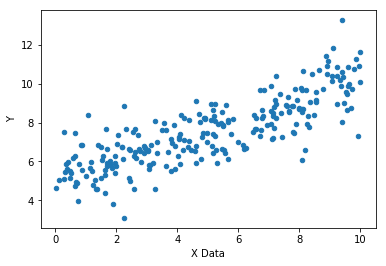

In [17]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [18]:
batch_size = 8

In [19]:
np.random.randn(2)

array([-0.04137019,  0.55196182])

In [20]:
m = tf.Variable(-0.04)
b = tf.Variable(0.55)

In [21]:
xph = tf.placeholder(tf.float32, [batch_size])

In [22]:
yph = tf.placeholder(tf.float32, [batch_size])

In [23]:
y_model = m * xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
         
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [33]:
model_m

0.5073248

In [34]:
model_b

4.985133

In [35]:
y_hat = x_data * model_m + model_b

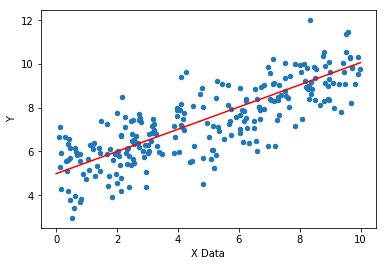

In [36]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

# TF ESTIMATOR

In [37]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [38]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\temp\\tmpr_n_usam', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021946AF8A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
 from sklearn.model_selection import train_test_split

In [41]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [42]:
print(x_train.shape)

(700000,)


In [43]:
print(x_eval.shape)

(300000,)


In [44]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [45]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [46]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [47]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\temp\tmpr_n_usam\model.ckpt.
INFO:tensorflow:loss = 390.0479, step = 1
INFO:tensorflow:global_step/sec: 559.174
INFO:tensorflow:loss = 15.754012, step = 101 (0.182 sec)
INFO:tensorflow:global_step/sec: 879.534
INFO:tensorflow:loss = 17.798447, step = 201 (0.114 sec)
INFO:tensorflow:global_step/sec: 964.11
INFO:tensorflow:loss = 12.929463, step = 301 (0.103 sec)
INFO:tensorflow:global_step/sec: 1067.7
INFO:tensorflow:loss = 9.9432745, step = 401 (0.092 sec)
INFO:tensorflow:global_step/sec: 987.027
INFO:tensorflow:loss = 21.280594, step = 501 (0.102 sec)
INFO:tensorflow:global_step/sec: 851.708
INFO:tensorflow:loss = 5.9753265, step = 601 (0.120 sec)
INFO:tensorflow:global_step/sec: 777.296
INFO:tensorflow:

In [48]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-27-14:38:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\temp\tmpr_n_usam\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-27-14:38:03
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0765407, global_step = 1000, loss = 8.612326


In [49]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-27-14:39:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\temp\tmpr_n_usam\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-27-14:39:17
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0986991, global_step = 1000, loss = 8.789593


In [50]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0765407, 'loss': 8.612326, 'global_step': 1000}


In [51]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0986991, 'loss': 8.789593, 'global_step': 1000}


In [52]:
brand_new_data = np.linspace(0, 10, 10)

In [53]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)

In [54]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\temp\tmpr_n_usam\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.472627], dtype=float32)},
 {'predictions': array([5.1343846], dtype=float32)},
 {'predictions': array([5.796142], dtype=float32)},
 {'predictions': array([6.4578996], dtype=float32)},
 {'predictions': array([7.1196575], dtype=float32)},
 {'predictions': array([7.781415], dtype=float32)},
 {'predictions': array([8.443172], dtype=float32)},
 {'predictions': array([9.10493], dtype=float32)},
 {'predictions': array([9.766687], dtype=float32)},
 {'predictions': array([10.428445], dtype=float32)}]

In [55]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\temp\tmpr_n_usam\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([4.472627], dtype=float32),
 array([5.1343846], dtype=float32),
 array([5.796142], dtype=float32),
 array([6.4578996], dtype=float32),
 array([7.1196575], dtype=float32),
 array([7.781415], dtype=float32),
 array([8.443172], dtype=float32),
 array([9.10493], dtype=float32),
 array([9.766687], dtype=float32),
 array([10.428445], dtype=float32)]

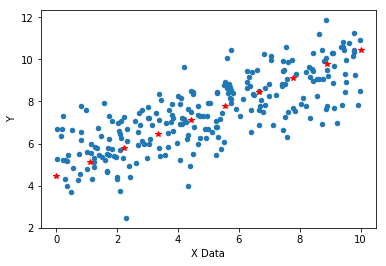

In [58]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions, 'r*')